<a href="https://colab.research.google.com/github/zeluizgo/bnwar/blob/gh-pages/LendoDadosCotacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/EURUSD240.csv"

#dataframe
df = pd.read_csv(file_path,names=['cuote_date', 'cuote_time','cuote_open', 'cuote_high', 'cuote_low', 'cuote_close', 'volume'], header=None)
df['index'] = "EURUSD"
df['in_pressure'] = (df['cuote_close']-df['cuote_open'])/(df['cuote_high']-df['cuote_low'])
df['in_amplitude'] = (df['cuote_high']-df['cuote_low'])
df['in_price_diff'] = (df['cuote_close']-df['cuote_open'])
df['in_mov_avg10'] = df['cuote_close'].rolling(window=9).mean()
df['cuote_timestamp'] = pd.to_datetime(df['cuote_date']+' ' + df['cuote_time'], format='%Y.%m.%d %H:%M')
df.head()

,cuote_date,cuote_time,cuote_open,cuote_high,cuote_low,cuote_close,volume,index,in_pressure,in_amplitude,in_price_diff,in_mov_avg10,cuote_timestamp
0,2009.12.21,00:00,1.4311,1.4347,1.4311,1.4342,5504,EURUSD,0.861111,0.0036,0.0031,NaN,2009-12-21 00:00:00
1,2009.12.21,04:00,1.4342,1.4357,1.4327,1.4334,5234,EURUSD,-0.266667,0.0030,-0.0008,NaN,2009-12-21 04:00:00
2,2009.12.21,08:00,1.4334,1.4342,1.4280,1.4337,8366,EURUSD,0.048387,0.0062,0.0003,NaN,2009-12-21 08:00:00
3,2009.12.21,12:00,1.4337,1.4371,1.4330,1.4333,8456,EURUSD,-0.097561,0.0041,-0.0004,NaN,2009-12-21 12:00:00
4,2009.12.21,16:00,1.4332,1.4335,1.4286,1.4294,8488,EURUSD,-0.775510,0.0049,-0.0038,NaN,2009-12-21 16:00:00


In [ ]:
import numpy as np
# Converting to Array
#my_ohlc_data = np.array(df[['cuote_timestamp','cuote_close']])
#my_ohlc_data = np.array(df[['cuote_close']])


#my_ohlc_data


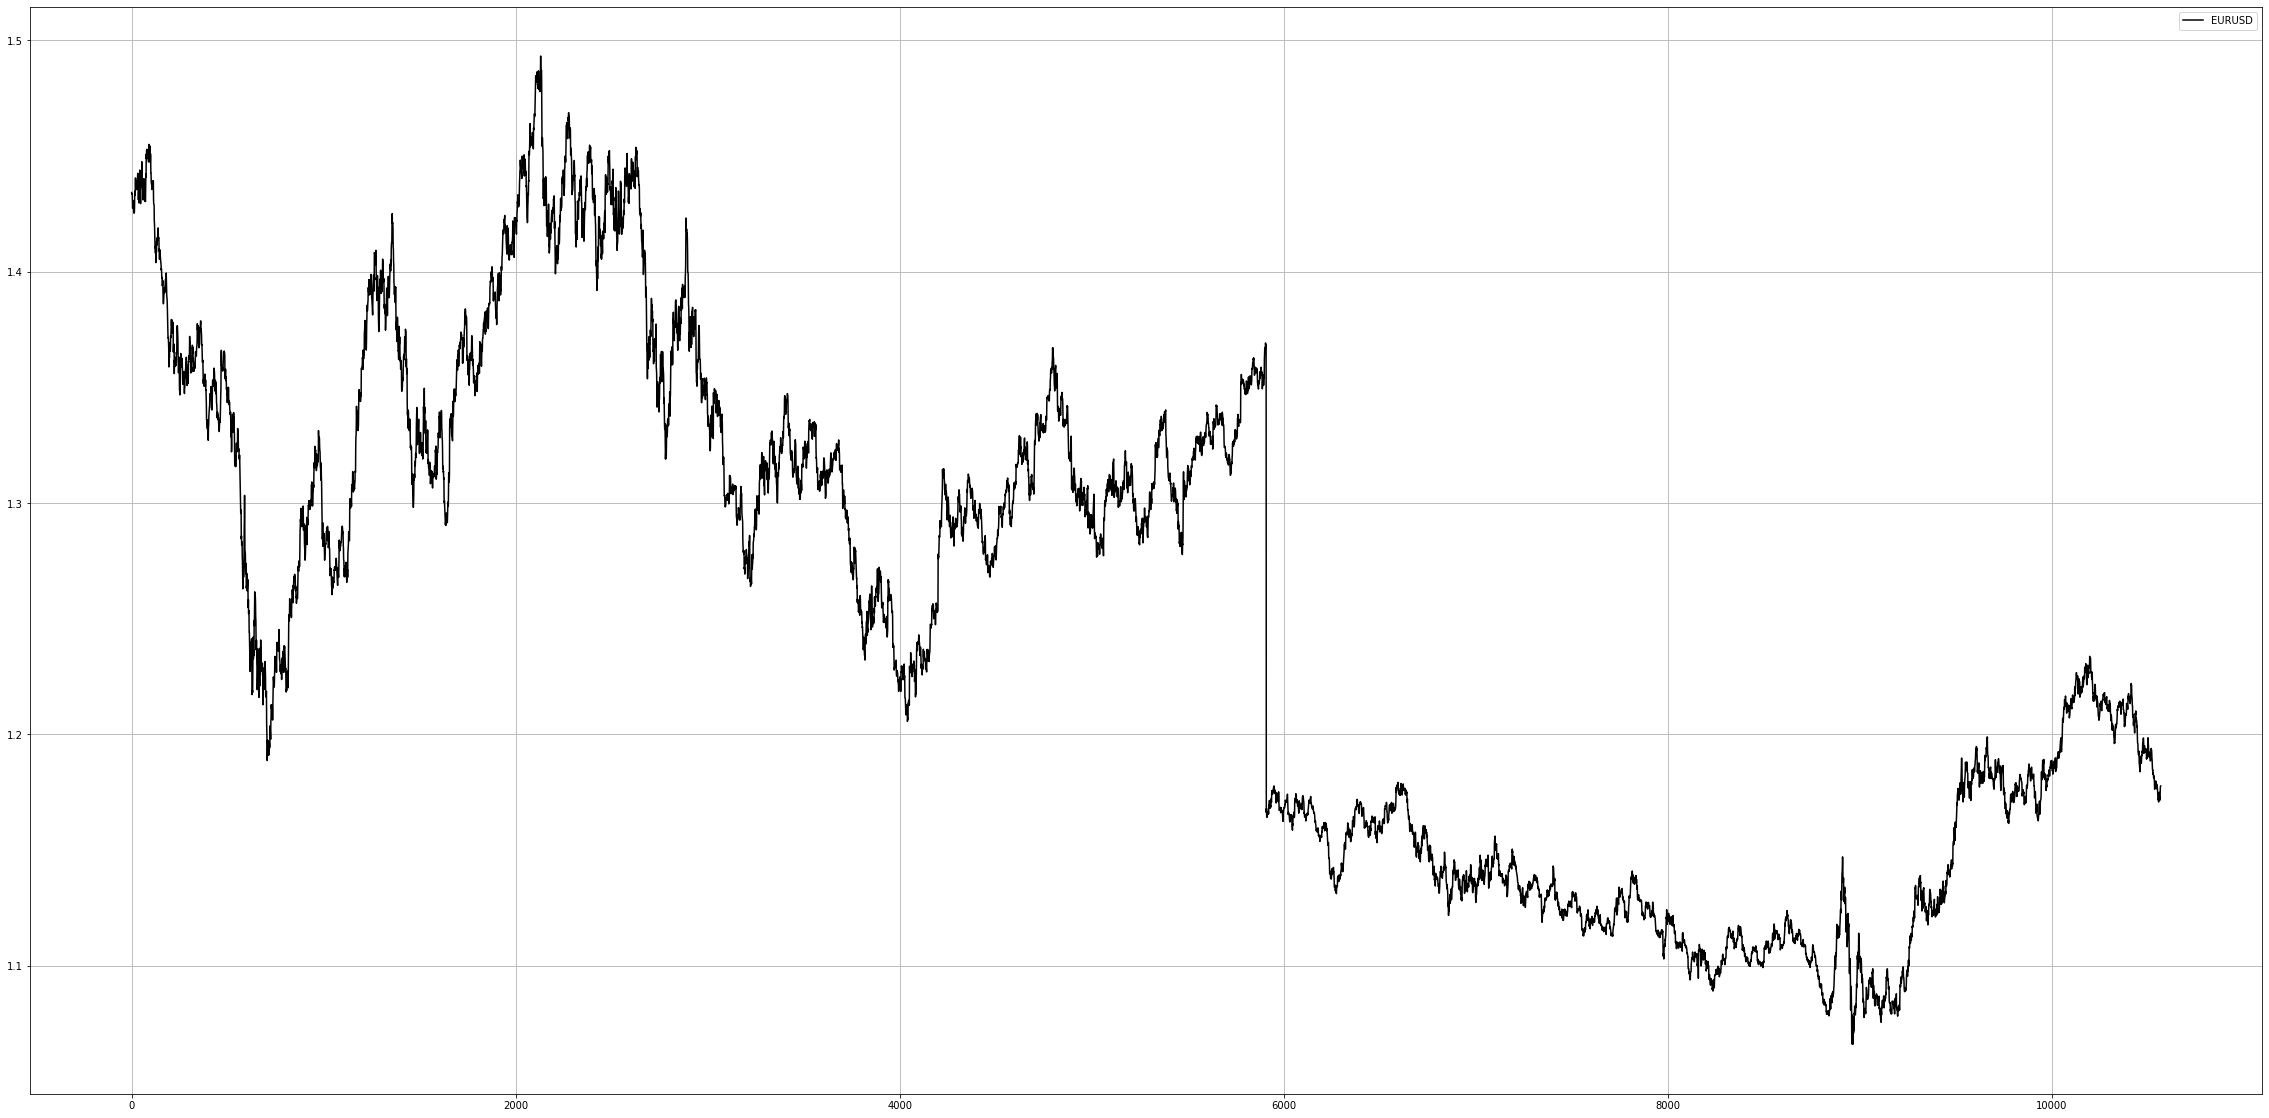

In [ ]:
# Importing the necessary charting library
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
# plt.style.use('ggplot')
# The syntax to plot a line chart
plt.plot(np.array(df['cuote_close']), color = 'black', label = 'EURUSD')
# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()


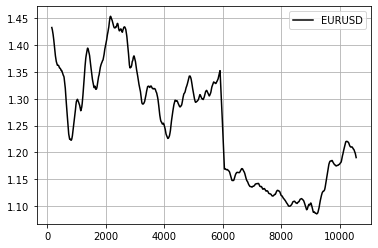

In [ ]:

plt.plot(np.array(df['in_mov_avg10']), color = 'black', label = 'EURUSD')
# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()


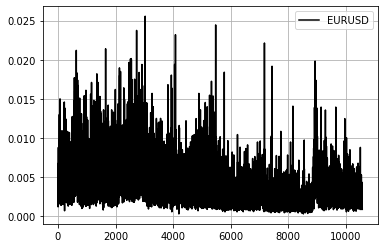

In [ ]:

plt.plot(np.array(df['in_amplitude']), color = 'black', label = 'EURUSD')
# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()

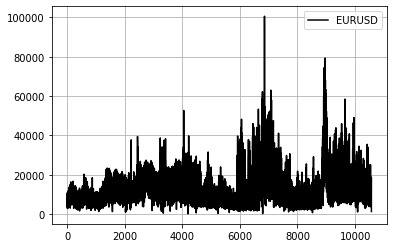

In [ ]:

plt.plot(np.array(df['volume']), color = 'black', label = 'EURUSD')
# The syntax to add the label created above
plt.legend()
# The syntax to add a grid
plt.grid()

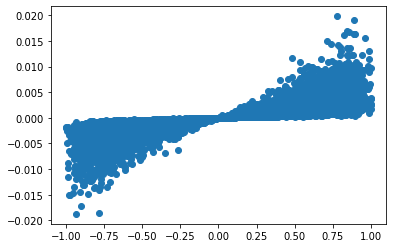

In [ ]:
plt.scatter(np.array(df['in_pressure']),np.array(df['in_price_diff']))

plt.show()

In [ ]:
def fplot_candle(df_cuotes):
  plt.figure(figsize=(20,10))
  qtLines = len(df_cuotes)
  for iCount in range(qtLines):
    plt.vlines(x=df_cuotes['cuote_timestamp'][iCount], ymin=df_cuotes['cuote_low'][iCount],ymax=df_cuotes['cuote_high'][iCount], colors='black', linewidth=1)
    if df_cuotes['cuote_close'][iCount] > df_cuotes['cuote_open'][iCount]:
      color_chosen = 'green'
      plt.vlines(x=df_cuotes['cuote_timestamp'][iCount], ymin=df_cuotes['cuote_open'][iCount],ymax=df_cuotes['cuote_close'][iCount], colors=color_chosen, linewidth=4)    
    if df_cuotes['cuote_open'][iCount] > df_cuotes['cuote_close'][iCount]:
      color_chosen = 'red'
      plt.vlines(x=df_cuotes['cuote_timestamp'][iCount], ymin=df_cuotes['cuote_close'][iCount],ymax=df_cuotes['cuote_open'][iCount], colors=color_chosen, linewidth=4)
    if df_cuotes['cuote_open'][iCount] == df_cuotes['cuote_close'][iCount]:
      color_chosen = 'black'
      plt.vlines(x=df_cuotes['cuote_timestamp'][iCount], ymin=df_cuotes['cuote_close'][iCount],ymax=df_cuotes['cuote_open'][iCount], colors=color_chosen, linewidth=4)
    
    if iCount > 5:
      fplot_resistences(df_cuotes, iCount,qtLines)
      fplot_supports(df_cuotes, iCount,qtLines)  
  
  plt.scatter(df_cuotes['cuote_timestamp'],df_cuotes['in_mov_avg10'])
  plt.grid()


def fplot_resistences(df_cuotes, iCount, qtLines):
  if df_cuotes['cuote_high'][iCount] > df_cuotes['cuote_high'][iCount-1] \
    and df_cuotes['cuote_high'][iCount] > df_cuotes['cuote_high'][iCount-2] \
    and df_cuotes['cuote_high'][iCount] > df_cuotes['cuote_high'][iCount-3] \
    and df_cuotes['cuote_high'][iCount] > df_cuotes['cuote_high'][iCount-4] \
    and df_cuotes['cuote_high'][iCount] > df_cuotes['cuote_high'][iCount-5]:
    plt.hlines(y=df_cuotes['cuote_high'][iCount], xmin=df_cuotes['cuote_timestamp'][iCount], xmax=df_cuotes['cuote_timestamp'][qtLines-1], colors='blue')

def fplot_supports(df_cuotes, iCount, qtLines):
  if df_cuotes['cuote_low'][iCount] < df_cuotes['cuote_low'][iCount-1] \
    and df_cuotes['cuote_low'][iCount] < df_cuotes['cuote_low'][iCount-2] \
    and df_cuotes['cuote_low'][iCount] < df_cuotes['cuote_low'][iCount-3] \
    and df_cuotes['cuote_low'][iCount] < df_cuotes['cuote_low'][iCount-4] \
    and df_cuotes['cuote_low'][iCount] < df_cuotes['cuote_low'][iCount-5]:
    plt.hlines(y=df_cuotes['cuote_low'][iCount], xmin=df_cuotes['cuote_timestamp'][iCount], xmax=df_cuotes['cuote_timestamp'][qtLines-1], colors='yellow')




In [ ]:
df.set_index('cuote_date',inplace=True)

In [ ]:
rows = ['2021.02.22','2021.02.23','2021.02.24','2021.02.25','2021.02.26',\
        '2021.03.01','2021.03.02','2021.03.03','2021.03.04','2021.03.05']

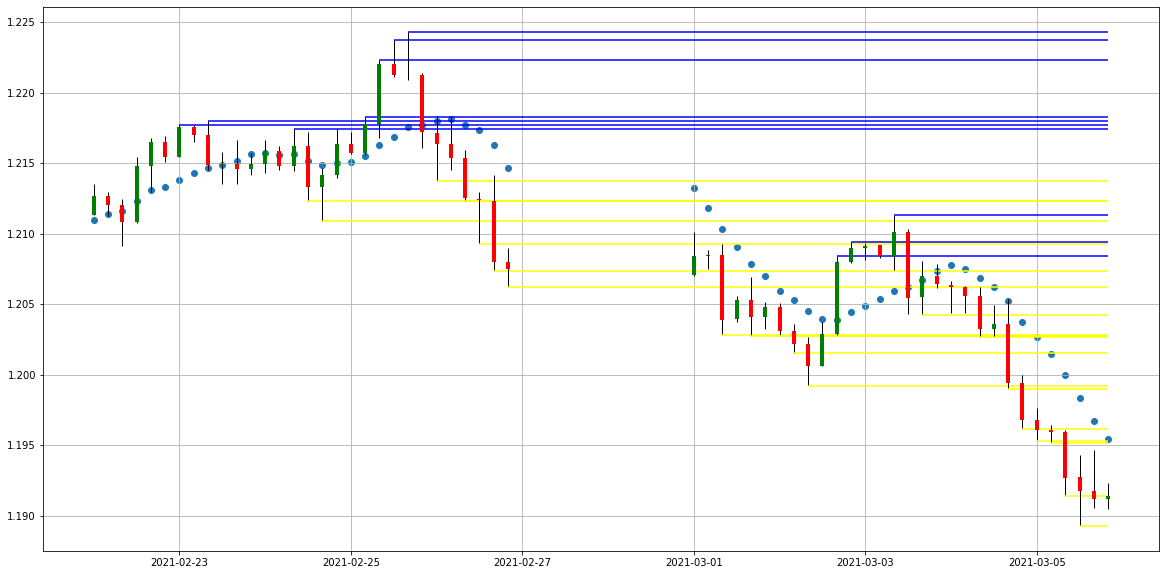

In [ ]:
#fplot_candle(array1)
fplot_candle(df.loc[rows])